<a href="https://colab.research.google.com/github/PremGorecki/MachineLearning/blob/main/01_MNIST_zadanie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spróbuj stworzyć klasyfikator zbioru danych MNIST osiągający ponad 97% dokładności dla zbioru testowego. Podpowiedź: całkiem nieźle sprawdza się klasyfikator **KNeighborsClassifier**;
musisz tylko dobrać odpowiednie wartości hiperparametrów (zastosuj metodę przeszukiwaniasiatki wobec hiperparametrów 
**weights in_neighbors**).

In [81]:
#Import libraries
import pandas as pd
import numpy as np

#import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [2]:

#Import data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()




dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape


(70000, 784)

In [4]:
y.shape

(70000,)

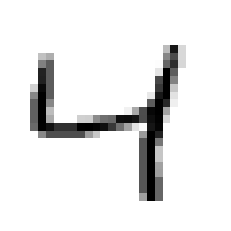

In [5]:
#How one digit looks like

some_digit = X.iloc[2]
some_digit = np.array(some_digit)

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()



In [6]:
y[2]

'4'

In [7]:
# Y is String so let's convert it to Int
y = y.astype(np.uint8)

In [8]:
y[2]

4

In [57]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [61]:
# Try KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
kn_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([4], dtype=uint8)

In [12]:
#Check metric for test data 
#cross_val_score(kn_clf, X_train, y_train, cv=3, scoring="accuracy")

In [66]:
#Check metrics for test and train data

y_train_pred = kn_clf.predict(X_train)
y_train_pred


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [67]:
y_test_pred = kn_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [68]:
# Confusion matrix for train data
confusion_matrix(y_train, y_train_pred)

array([[5893,    4,    2,    0,    1,    4,   14,    2,    1,    2],
       [   1, 6721,    7,    0,    0,    0,    1,    9,    1,    2],
       [  24,   36, 5821,   10,    7,    4,    6,   41,    6,    3],
       [   2,   12,   26, 6001,    0,   34,    2,   21,   17,   16],
       [   3,   39,    1,    1, 5724,    0,    6,    5,    2,   61],
       [  13,    5,    3,   35,    5, 5302,   38,    3,    3,   14],
       [  11,    9,    0,    0,    4,   12, 5882,    0,    0,    0],
       [   1,   46,   10,    2,    7,    0,    0, 6165,    0,   34],
       [  15,   59,   10,   40,   20,   51,   14,   11, 5591,   40],
       [  10,    6,    5,   22,   34,    9,    2,   39,    7, 5815]])

In [86]:
# This conversion is not necessary
y_test1 = np.array(y_test)
y_test1

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [69]:
# Confusion matrix for test data
confusion_matrix(y_test, y_test_pred)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]])

In [75]:
#Precision
precision_score_train = precision_score(y_train, y_train_pred, average='micro')
precision_score_train

0.9819166666666667

In [76]:
#Precision
precision_score_test = precision_score(y_test, y_test_pred, average='micro')
precision_score_test

0.9688

In [77]:
#Recall
recall_score_train = recall_score(y_train, y_train_pred, average='micro') 
recall_score_train

0.9819166666666667

In [78]:
#Recall
recall_score_test = recall_score(y_test, y_test_pred, average='micro') 
recall_score_test

0.9688

In [83]:
#F1 score
f1_score_train = f1_score(y_train, y_train_pred, average='micro')
f1_score_train

0.9819166666666667

In [84]:
#F1 score
f1_score_test = f1_score(y_test, y_test_pred, average='micro')
f1_score_test

0.9688

In [87]:
#Try to find difference

y_pos = y_test1[y_test1 != y_test_pred])
y_pos

# Na jutro wyświetlić wartości z dwóch tabel oraz obrazek i zobaczyć co tam jest

SyntaxError: ignored

In [56]:
y_test.astype

<bound method NDFrame.astype of 60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: uint8>

In [52]:
for idx1, idx2, in y_test[:10]:
 print(f"{idx1}, {idx2}")

TypeError: ignored

XXX - tu skończyłem

### Miary wydajności

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


NameError: ignored

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
#Macierz pomyłek

confusion_matrix(y_train_5, y_train_pred)


In [ ]:
# precyzja i pełność
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)


In [ ]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325

In [ ]:
#F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
#Kompromis miedzy precyzcją a pełnością

y_scores = sgd_clf.decision_function([some_digit])
y_scores


In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precyzja")
  plt.plot(thresholds, recalls[:-1], "g-", label="Pełność")

# Zaznaczenie progu, dodanie legendy, etykiet osi i siatki
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
threshold_90_precision

In [ ]:
y_train_pred_90 = (y_scores > threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_score(y_train_5, y_train_pred_90)

In [ ]:
# Wykres krzywej ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Przerywana przekątna wykresu
# Dodanie etykiety osi i siatki
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

In [ ]:
# Teraz sprawdzamy na innym klasyfikatorze
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # Wynik = prawd. przynależności do klasy pozytywnej
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Las losowy")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

### Wieloklasowa

In [ ]:
#Klasyfikator wektorów nośnych

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, a nie y_train_5
svm_clf.predict([some_digit])


In [ ]:
"""
Scikit-Learn skorzystał w rzeczywistości ze strategii OvO: wytrenował
45 klasyfikatorów binarnych, uzyskał wyniki decyzyjne dla analizowanego obrazu i wybrał klasę, która
wygrała większość „pojedynków”.
"""
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
# Można samemu wybrać strategię

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])


In [ ]:
len(ovr_clf.estimators_)

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

### Analiza błędów

In [ ]:
# Macierz pomyłek

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx  

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### Klasyfikacja wieloetykietowa

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
#F1 score
from sklearn.model_selection import cross_val_predict
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_multilabel, y_train_knn_pred, average="macro")

### Klasyfikacja wielowyjściowa

In [ ]:
# Utworzenie zbiorów uczących i testowych

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
some_index = 5
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)